# Домашнее задание №9. Регуляризация
Регуляризация помогает бороться с переобучением, штрафуя модель за большие значения коэффициентов.

In [59]:
import pandas as pd

songs = pd.read_csv("song_data.csv", nrows=500).dropna()
songs.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


## Задание 1
Для выбранного в прошлом задании датасета и выбранных в нем признаков постройте множественную линейную регрессию с регуляризацией Ridge (самостоятельно написанную или, например, <code>sklearn.linear_model.Ridge</code>).

Подбор параметров осуществляйте самостоятельно, либо используя встроенные средства, например, <code>sklearn.model_selection.GridSearchCV</code>.

Для оценки результатов выберите какую-нибудь метрику, например, MSE, и отслеживайте как она меняется для модели без регуляризации и с ней.

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import matplotlib as plt
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

X = songs[["song_duration_ms", "acousticness", "danceability", "energy", "instrumentalness", "key",
            "liveness", "loudness", "audio_mode", "speechiness", "tempo", "time_signature", "audio_valence"]]
Y = songs['song_popularity']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# alpha управляет силой регуляризации
# Чем больше alpha, тем сильнее штраф за большие коэффициенты модели (уменьшается переобучение, но может увеличиться недообучение)
# Чем меньше alpha, тем ближе модель к обычной линейной регрессии
alpha_values = {'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
ridge = GridSearchCV(Ridge(),           # Модель Ridge-регрессии
                     alpha_values,
                     scoring='neg_mean_squared_error',
                     cv=10)             # кросс-валидация

print('Лучшее значение alpha:', ridge.fit(X, Y).best_params_)

# Вывод neg_mean_squared_error - метрика для оценки качества модели (среднеквадратичная ошибка)
print('Метрика качества:', ridge.fit(X, Y).best_score_)

Лучшее значение alpha: {'alpha': 8}
Метрика качества: -224.40923223096064


Для справки: 

Положительные коэффициенты указывают на положительное влияние признака на популярность.

Отрицательные коэффициенты указывают на отрицательное влияние.

Чем ближе коэффициент к нулю, тем слабее влияние признака.

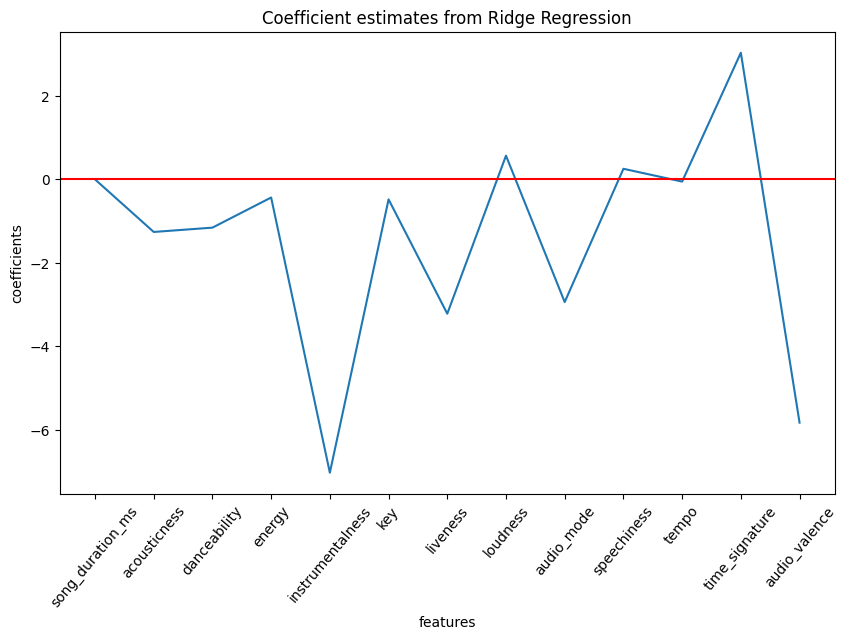

Mean Squared Error: 201.80447282967714


In [61]:
ridge = Ridge(alpha=8)
best_ridge_coeffs = ridge.fit(X, Y).coef_       # Возвращает коэффициенты модели для каждого признака
feature_names = X.columns
plt.figure(figsize = (10, 6))
plt.plot(range(len(feature_names)), best_ridge_coeffs)
plt.axhline(0, color = 'r', linestyle = 'solid')
plt.xticks(range(len(feature_names)), feature_names, rotation = 50)
plt.title("Coefficient estimates from Ridge Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Задание 2
Тоже самое, но теперь используя регуляризацию Lasso.

In [62]:
from sklearn.linear_model import Lasso

alpha_values = {'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
ridge = GridSearchCV(Lasso(),          
                     alpha_values,
                     scoring='neg_mean_squared_error',
                     cv=10)             # кросс-валидация
print('Лучшее значение alpha:', ridge.fit(X, Y).best_params_)

Лучшее значение alpha: {'alpha': 0.05}


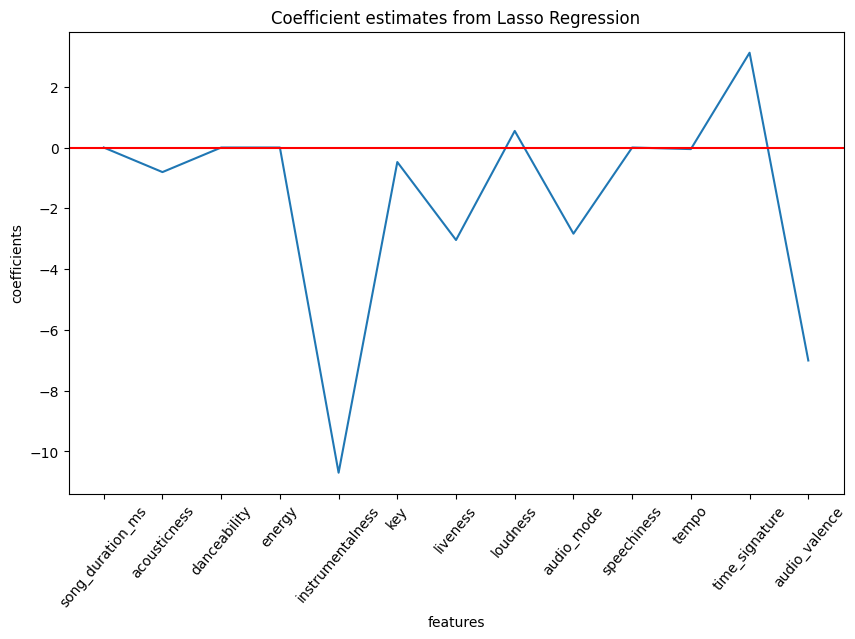

Mean Squared Error: 206.0670332338959


In [63]:
# Напишите свой код в данной ячейке
from sklearn.linear_model import Lasso

best_lasso_model = Lasso(alpha=0.05)
best_lasso_coeffs = best_lasso_model.fit(X, Y).coef_
plt.figure(figsize = (10, 6))
plt.plot(range(len(feature_names)), best_lasso_coeffs)
plt.axhline(0, color = 'r', linestyle = 'solid')
plt.xticks(range(len(feature_names)), feature_names, rotation = 50)
plt.title("Coefficient estimates from Lasso Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()
best_lasso_model.fit(x_train, y_train)
y_pred = best_lasso_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Задание 3

Тоже самое, но теперь используя регуляризацию Elastic Net.

In [64]:
from sklearn.linear_model import ElasticNet

alpha_values = {'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
ridge = GridSearchCV(ElasticNet(),          
                     alpha_values,
                     scoring='neg_mean_squared_error',
                     cv=10)             # кросс-валидация
print('Лучшее значение alpha:', ridge.fit(X, Y).best_params_)

Лучшее значение alpha: {'alpha': 0.02}


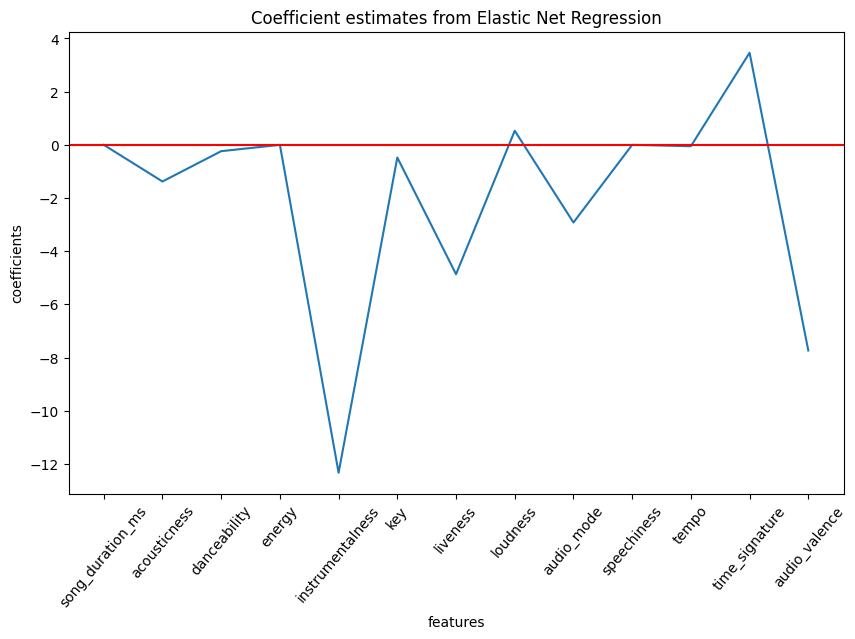

Mean Squared Error: 209.25938045554472


In [65]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.02, l1_ratio=1)
best_coeffs = elastic.fit(X, Y).coef_
plt.figure(figsize = (10, 6))
plt.plot(range(len(feature_names)), best_coeffs)
plt.axhline(0, color = 'r', linestyle = 'solid')
plt.xticks(range(len(feature_names)), feature_names, rotation = 50)
plt.title("Coefficient estimates from Elastic Net Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()
elastic.fit(x_train, y_train)
y_pred = elastic.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)